In [7]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import numpy as np
import pandas as pd
import gzip
import pickle as cPickle
import matplotlib.pyplot as plt


# In[2]:

data = gzip.open("/media/khurshed2504/Data/PycharmProjects/ML_temp0/mnist.pkl.gz")
train_data,  validation_data, test_data = cPickle.load(data,encoding="latin1")


X = train_data[0]
X = X.T
print("X Shape : ",X.shape)
n_X = X.shape[0]
m = X.shape[1]

Ynum = train_data[1]
print("Ynum Shape (Native) : ", Ynum.shape)
Ynum = Ynum.reshape(1, Ynum.shape[0])
print("Ynum Shape (After Reshape) : ", Ynum.shape)
print(Ynum)

print("Shape of Test Data : ", test_data[0].shape)
# Y = np.eye(10)[Ynum]
# print(Y.shape)
# Y = Y.squeeze()
# print(Y.shape)
# Y = Y.reshape(10,50000)
Y = np.zeros((10,m))
for i in range(m):
    Y[int(Ynum[0,i]),i]=1

# In[3]:


def relu(Z):
    result = (Z + np.abs(Z))/2
    return result


# In[4]:


def relu_backward(Z):
    result = (Z + np.abs(Z))/(2*np.abs(Z))
    return result


# In[5]:
def prediction(Al, Ynum):
    arg = np.argmax(Al,axis=0)
    arg = arg.reshape(1,Ynum.shape[1])
    # print(arg.shape, Ynum.shape)
    cnt = 0
    # print("predicting")
    for i in range(Ynum.shape[1]):
        if(arg[0,i]==Ynum[0,i]):
            cnt = cnt+1
    return (cnt/Ynum.shape[1])

def softmax(Z):
    temp = np.exp(Z)
    result = temp/np.sum(temp,axis = 0,keepdims = True)
    return result


# In[6]:


def initialize_parameters(layer_dims):
    parameters = {}
    L = len(layer_dims) - 1
    for l in range(1,L + 1):
        parameters["W" + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters["b" + str(l)] = np.zeros((layer_dims[l],1))
        #print(parameters)
    return parameters


# In[7]:


def forward_prop(X,parameters):
    cache = {}
    L = len(layer_dims) - 1
    A_prev = X
    for l in range(1,L):
        Z = parameters["W" + str(l)].dot(A_prev) + parameters["b" + str(l)]
        A = relu(Z)
        cache["Z" + str(l)] = Z
        A_prev = A
    Z = parameters["W" + str(L)].dot(A_prev) + parameters["b" + str(L)]
    AL = softmax(Z)
    cache["Z" + str(L)] = Z
    return AL,cache


# In[8]:


def compute_cost(AL,Y):
    m = AL.shape[1]
    cost = (np.sum(-(Y * np.log(AL))))/(m)
    return cost


# In[9]:


def backward_prop(X,Y,cache,parameters,AL,layer_dims):
    m = X.shape[1]
    dparameters = {}
    L = len(layer_dims) - 1
    dZ = AL - Y
    dparameters["dW" + str(L)] = dZ.dot(relu(cache["Z" + str(L-1)]).transpose())/m
    #dparameters["dW" + str(L)] = dZ.dot(X.transpose())/m
    dparameters["db" + str(L)] = np.sum(dZ,axis = 1,keepdims = True)/m
    for l in range(1,L):
        dZ = ((parameters["W" + str(L-l+1)].transpose()).dot(dZ)) * (relu_backward(cache["Z" + str(L-l)]))
        if L-l-1 != 0:
            dparameters["dW" + str(L-l)] = dZ.dot(relu(cache["Z" + str(L-1-l)]).transpose())/m
        else:
            dparameters["dW" + str(L-l)] = dZ.dot(X.transpose())/m
        dparameters["db" + str(L-l)] = np.sum(dZ,axis = 1,keepdims = True)/m
    return dparameters  


# In[10]:


def update_parameters(parameters,dparameters,layer_dims,learning_rate):
    L = len(layer_dims) - 1
    for l in range(1,L+1):
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate*dparameters["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate*dparameters["db" + str(l)]
    return parameters


# In[11]:


def learn(X,Y,layer_dims,learning_rate,num_iters):
    costs = []
    accs = []
    parameters = initialize_parameters(layer_dims)
    for i in range(num_iters):
        AL,cache = forward_prop(X,parameters)
        dparameters = backward_prop(X,Y,cache,parameters,AL,layer_dims)
        parameters = update_parameters(parameters,dparameters,layer_dims,learning_rate)
        costs.append(compute_cost(AL, Ynum))
        accs.append(100*prediction(AL,Ynum))
        if i%10 == 0:
            print("Accuracy after ",i," Iterarions is : ",100*prediction(AL,Ynum))

    return parameters,costs,accs


# In[13]:


#trainig
layer_dims = [784,120,10]
parameters,costs,accs = learn(X,Y,layer_dims,0.3,1000)





X Shape :  (784, 50000)
Ynum Shape (Native) :  (50000,)
Ynum Shape (After Reshape) :  (1, 50000)
[[5 0 4 ... 8 4 8]]
Shape of Test Data :  (10000, 784)
Accuracy after  0  Iterarions is :  9.112
Accuracy after  10  Iterarions is :  42.158
Accuracy after  20  Iterarions is :  66.022
Accuracy after  30  Iterarions is :  75.232
Accuracy after  40  Iterarions is :  81.12
Accuracy after  50  Iterarions is :  84.014
Accuracy after  60  Iterarions is :  85.926
Accuracy after  70  Iterarions is :  86.978
Accuracy after  80  Iterarions is :  87.764
Accuracy after  90  Iterarions is :  88.33800000000001
Accuracy after  100  Iterarions is :  88.722
Accuracy after  110  Iterarions is :  89.082
Accuracy after  120  Iterarions is :  89.398
Accuracy after  130  Iterarions is :  89.64999999999999
Accuracy after  140  Iterarions is :  89.90599999999999
Accuracy after  150  Iterarions is :  90.106
Accuracy after  160  Iterarions is :  90.252
Accuracy after  170  Iterarions is :  90.45
Accuracy after  180

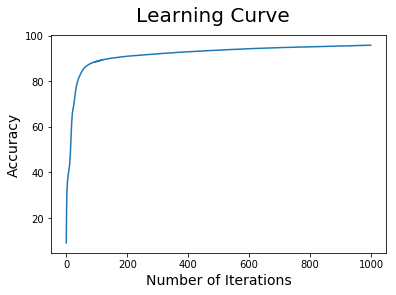

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Learning Curve', fontsize=20)
plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Accuracy', fontsize = 14)
plt.plot(accs)

In [13]:
X_test = test_data[0]
X_test = X_test.T
A, cache  = forward_prop(X_test, parameters)
Ynum_test = test_data[1]
#print("Ynum Shape (Native) : ", Ynum.shape)
Ynum_test = Ynum_test.reshape(1, Ynum_test.shape[0])
#print("Ynum Shape (After Reshape) : ", Ynum.shape)
#print(Ynum1)
print("Accuracy over Test Set is : ",100*prediction(A,Ynum_test))

Accuracy over Test Set is :  95.38


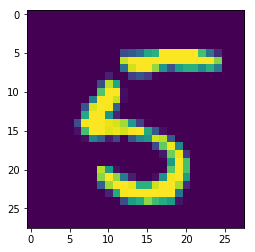

It is a :  5


In [14]:
index = 897
x = X_test[:,index].reshape(784,1)
im = x.reshape(28,28)
plt.imshow(im)
plt.show()
A, Z = forward_prop(x, parameters)
print("It is a : ",np.argmax(A))

In [16]:
import pandas as pd
dfW1 = pd.DataFrame(parameters["W1"])
dfW1.to_csv("/media/khurshed2504/Data/PycharmProjects/ML_temp0/NumPy Multi Layer Parameters/W1.csv",header=None,index=None)

dfW2 = pd.DataFrame(parameters["W2"])
dfW2.to_csv("/media/khurshed2504/Data/PycharmProjects/ML_temp0/NumPy Multi Layer Parameters/W2.csv",header=None,index=None)

dfb1 = pd.DataFrame(parameters["b1"])
dfb1.to_csv("/media/khurshed2504/Data/PycharmProjects/ML_temp0/NumPy Multi Layer Parameters/b1.csv",header=None,index=None)
            
import pandas as pd
dfb2 = pd.DataFrame(parameters["b2"])
dfb2.to_csv("/media/khurshed2504/Data/PycharmProjects/ML_temp0/NumPy Multi Layer Parameters/b2.csv",header=None,index=None)